In [ ]:
# # run if "deeplake" is not installed
!pip install deeplake
import tensorflow as tf
from tensorflow import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import deeplake
ds_train = deeplake.load("hub://activeloop/animal10n-train")
ds_test = deeplake.load("hub://activeloop/animal10n-test")

\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/animal10n-train



\

hub://activeloop/animal10n-train loaded successfully.



\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/animal10n-test



\

hub://activeloop/animal10n-test loaded successfully.



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

Label: [6]
Label: [5]
Label: [3]
Label: [4]
Label: [1]
Label: [0]
Label: [9]


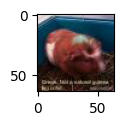

In [ ]:
plt.figure(figsize=(1, 1))
for images in ds_train.tensorflow().take(7):
  plt.imshow(images['images'])
  print(f"Label: {images['labels'].numpy()}")

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

x_data = ds_train['images']
x_data = np.reshape(x_data, (x_data.shape[0], 64, 64, 3))
x_data = x_data.astype('float32') / 255.0

y_data = to_categorical(ds_train["labels"])


x_test = ds_test['images']
x_test = np.reshape(x_test, (x_test.shape[0], 64, 64, 3))
x_test = x_test.astype('float32') / 255.0

y_test = to_categorical(ds_test["labels"])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_data, y_data, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 396s 249ms/step - loss: 1.6661 - accuracy: 0.4030 - val_loss: 1.3710 - val_accuracy: 0.5178
Epoch 2/100
1563/1563 [==============================] - 376s 240ms/step - loss: 1.3528 - accuracy: 0.5149 - val_loss: 1.2280 - val_accuracy: 0.5646
Epoch 3/100
1563/1563 [==============================] - 357s 228ms/step - loss: 1.2187 - accuracy: 0.5636 - val_loss: 1.2048 - val_accuracy: 0.5770
Epoch 4/100
1563/1563 [==============================] - 355s 227ms/step - loss: 1.1024 - accuracy: 0.6037 - val_loss: 1.1330 - val_accuracy: 0.6082
Epoch 5/100
1563/1563 [==============================] - 355s 227ms/step - loss: 0.9930 - accuracy: 0.6430 - val_loss: 1.1301 - val_accuracy: 0.6086
Epoch 6/100
1563/1563 [==============================] - 353s 226ms/step - loss: 0.8859 - accuracy: 0.6820 - val_loss: 1.1736 - val_accuracy: 0.6092
Epoch 7/100
1563/1563 [==============================] - 354s 227ms/step - loss: 0.7793 - accuracy: 0.7185

In [ ]:
predictions = model.predict(x_test)
predicted_class = np.argmax(predictions)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy
print(f"Accuracy: {accuracy}")

In [ ]:
model.save('first_model_try_hw12.h5')

In [ ]:
model.summary()